<a href="https://colab.research.google.com/github/Vaishnavisharan/Machine_Learning-Project/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score

LOADING TRAINING DATA SET 

In [2]:
train=pd.read_csv('loan.csv')

In [3]:
train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [4]:
train.shape

(500, 15)

In [5]:
train.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [7]:
train.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,482.000000,486.000000,459.000000
mean,249.500000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,144.481833,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,124.750000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,249.500000,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,374.250000,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,499.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [8]:
train.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [9]:
train.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

FILLING NULL VALUES 

In [10]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [11]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [12]:
train.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [13]:
train['Gender'].value_counts()

Male      409
Female     91
Name: Gender, dtype: int64

In [14]:
train['Married'].value_counts()

Yes    325
No     175
Name: Married, dtype: int64

In [15]:
train['Education'].value_counts()

Graduate        393
Not Graduate    107
Name: Education, dtype: int64

In [16]:
train['Property_Area'].value_counts()

Semiurban    188
Urban        171
Rural        141
Name: Property_Area, dtype: int64

In [17]:
train['Self_Employed'].value_counts()

No     434
Yes     66
Name: Self_Employed, dtype: int64

In [18]:
train['Loan_Status'].value_counts()

Y    345
N    155
Name: Loan_Status, dtype: int64

DATA PREPROCESSING

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])
train['Married']=le.fit_transform(train['Married'])
train['Education']=le.fit_transform(train['Education'])
train['Self_Employed']=le.fit_transform(train['Self_Employed'])
train['Property_Area']=le.fit_transform(train['Property_Area'])
train['Dependents']=le.fit_transform(train['Dependents'])
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [20]:
train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,1,0,0,0,0,5849,0.0,144.020747,360.0,1.0,2,1,$5849.0
1,1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,$6091.0
2,2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,$3000.0
3,3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,$4941.0
4,4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,$6000.0


In [21]:
train.drop(['Loan_ID','Dependents'], axis=1,inplace=True)


DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16f215a450>]],
      dtype=object)

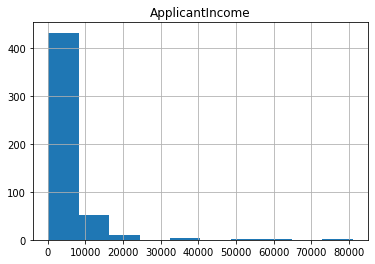

In [22]:
train.hist(['ApplicantIncome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16f2047cd0>]],
      dtype=object)

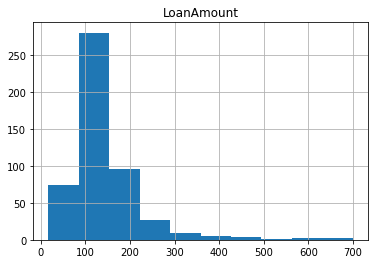

In [23]:
train.hist(['LoanAmount'])

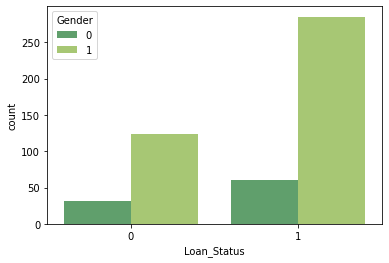

In [24]:
sns.countplot(x="Loan_Status",hue="Gender",data=train,palette="summer")

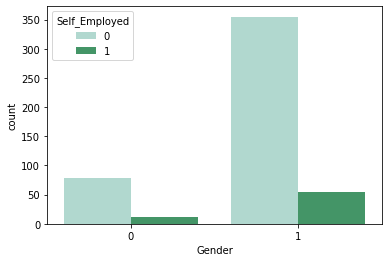

In [25]:
sns.countplot(x="Gender",hue="Self_Employed",data=train,palette="BuGn")

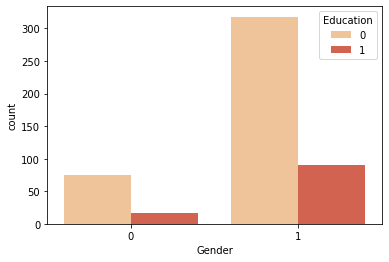

In [26]:
sns.countplot(x="Gender",hue="Education",data=train,palette="OrRd")

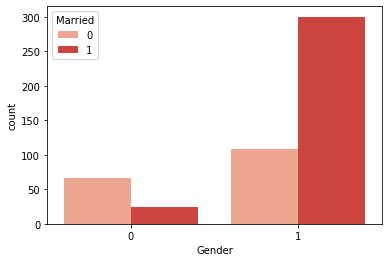

In [27]:
sns.countplot(x="Gender",hue="Married",data=train,palette="Reds")

In [28]:
train['Total_Income']=train['ApplicantIncome'] +	train['CoapplicantIncome']
train.head()

,Unnamed: 0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,1,0,0,0,5849,0.0,144.020747,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


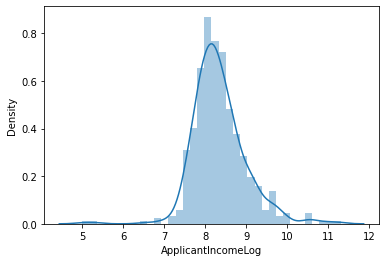

In [29]:
train['ApplicantIncomeLog']=np.log(train['ApplicantIncome'])
sns.distplot(train['ApplicantIncomeLog'])

In [30]:
train['CoapplicantIncomeLog']=np.log(train['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


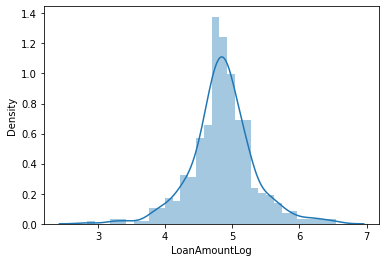

In [31]:
train['LoanAmountLog']=np.log(train['LoanAmount'])
sns.distplot(train['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


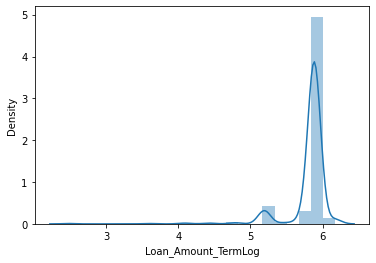

In [32]:
train['Loan_Amount_TermLog']=np.log(train['Loan_Amount_Term'])
sns.distplot(train['Loan_Amount_TermLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


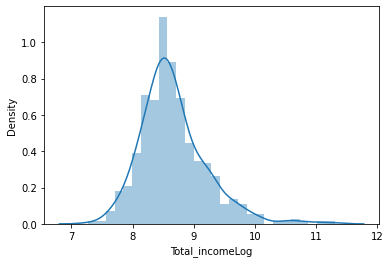

In [33]:
train['Total_incomeLog']=np.log(train['Total_Income'])
sns.distplot(train['Total_incomeLog'])

CORRELATION MATRIX

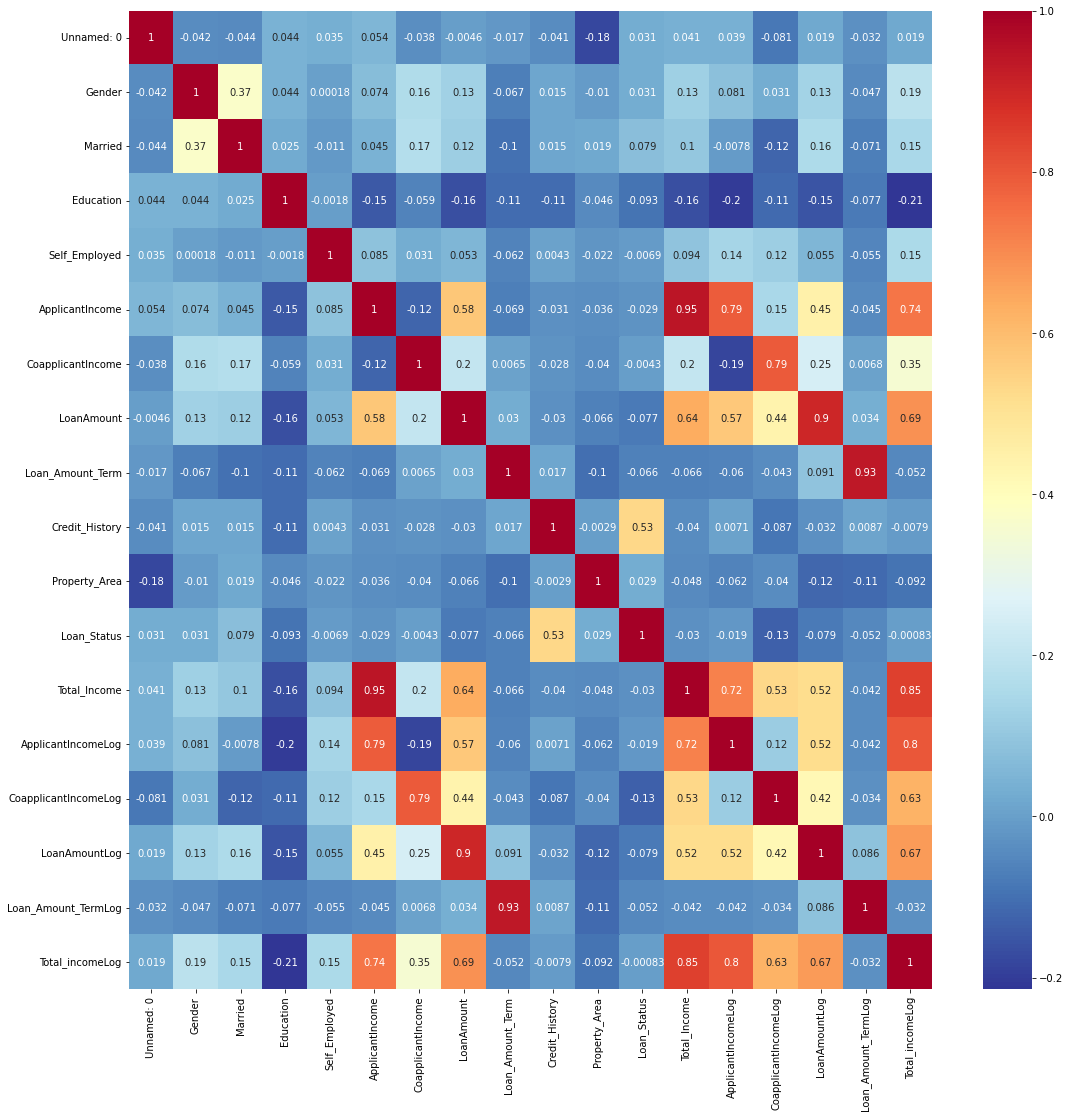

In [34]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlBu_r')

plt.show()

DROP UNWANTED COLUMNS 

In [35]:
train.drop(['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term','Total_Income'],axis=1,inplace=True)
train.head()

,Unnamed: 0,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_incomeLog
0,0,1,0,0,0,1.0,2,1,8.674026,-inf,4.969957,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,7.318540,4.852030,5.886104,8.714568
2,2,1,1,0,1,1.0,2,1,8.006368,-inf,4.189655,5.886104,8.006368
3,3,1,1,1,0,1.0,2,1,7.856707,7.765569,4.787492,5.886104,8.505323
4,4,1,0,0,0,1.0,2,1,8.699515,-inf,4.948760,5.886104,8.699515


LOADING TESTING DATA SET 

In [36]:
test=pd.read_csv('loantest.csv')

In [37]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [38]:
test.shape

(367, 12)

In [39]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [40]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

FILLING NULL VALUES 

In [43]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [44]:
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])

In [45]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

DATA PREPROCESSING 

In [46]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
test['Gender']=le.fit_transform(test['Gender'])
test['Married']=le.fit_transform(test['Married'])
test['Education']=le.fit_transform(test['Education'])
test['Self_Employed']=le.fit_transform(test['Self_Employed'])
test['Property_Area']=le.fit_transform(test['Property_Area'])

In [47]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [48]:
test['Total_income']=test['ApplicantIncome'] +	test['CoapplicantIncome']
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,5720
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,4576
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,6800
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,4886
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,3276


In [49]:
test['ApplicantIncomeLog']=np.log(test['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
test['CoapplicantIncomeLog']=np.log(test['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
test['LoanAmountLog']=np.log(test['LoanAmount'])

In [52]:
test['Total_incomeLog']=np.log(test['Total_income'])

In [53]:
test.drop(['Loan_ID','ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term','Total_income'],axis=1,inplace=True)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Total_incomeLog
0,1,1,0,0,0,1.000000,2,8.651724,-inf,4.700480,8.651724
1,1,1,1,0,0,1.000000,2,8.031385,7.313220,4.836282,8.428581
2,1,1,2,0,0,1.000000,2,8.517193,7.495542,5.337538,8.824678
3,1,1,2,0,0,0.825444,2,7.757906,7.842279,4.605170,8.494129
4,1,0,0,1,0,1.000000,2,8.094378,-inf,4.356709,8.094378


In [54]:
test.dtypes

Gender                    int64
Married                   int64
Dependents               object
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
ApplicantIncomeLog      float64
CoapplicantIncomeLog    float64
LoanAmountLog           float64
Total_incomeLog         float64
dtype: object

ASSINING X AND Y VALUES

In [55]:
X=np.array(train.index).reshape(-1,1)
y=train['Loan_Status']

SPLITTING TRAIN AND TEST DATA

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=6)

STANDARDISE THE DATA 

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)

LOGISTIC REGRESSION 

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)

In [60]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SCORES OF TRAINING TESTING DATA

In [61]:
print("Train_score:", lr.score(X_train,y_train))
print("Test_score:",lr.score(X_test,y_test))

Train_score: 0.68
Test_score: 0.7133333333333334


ACCURACY AND CROSS VALIDATION OF TRAINING AND TESTING DATA

In [62]:
print("accuracy:",lr.score(X_test,y_test)*100)
print("cross validation",np.mean(score)*100)

accuracy: 71.33333333333334
cross validation 69.0


RANDOM FOREST CLASSIFIER

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [64]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

SCORES OF TRAINING TESTING DATA

In [65]:
print("Train_score:", rf.score(X_train,y_train))
print("Test_score:",rf.score(X_test,y_test))

Train_score: 1.0
Test_score: 0.5933333333333334


ACCURACY AND CROSS VALIDATION OF TRAINING AND TESTING DATA


In [66]:
print("accuracy:",rf.score(X_test,y_test)*100)
print("cross validation",np.mean(score)*100)

accuracy: 59.333333333333336
cross validation 69.0


ADABOOST CLASSIFIER 

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()

In [68]:
ab.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

SCORES OF TRAINING AND TESTING DATA 

In [69]:
print("Train_score:", ab.score(X_train,y_train))
print("Test_score:",ab.score(X_test,y_test))

Train_score: 0.7085714285714285
Test_score: 0.6933333333333334


DECISION TREE CLASSIFIER 

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [71]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

SCORES OF TRAINING AND TESTING DATA 

In [72]:
print("Train_score:", dtc.score(X_train,y_train))
print("Test_score:",dtc.score(X_test,y_test))

Train_score: 1.0
Test_score: 0.5933333333333334


CONFUSION MATRIX FOR RANDOM CLASSIFIER 

In [73]:
rf=RandomForestClassifier(n_estimators=200,min_samples_split=25 , max_depth=7 , max_features=1)
rf.fit(X_train, y_train)
print("accuracy:",rf.score(X_test,y_test)*100)
print("cross validation",np.mean(score)*100)

accuracy: 68.66666666666667
cross validation 69.0


In [74]:
prediction=rf.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[  2,  41],
       [  6, 101]])